## Python Optimizations: String Interning

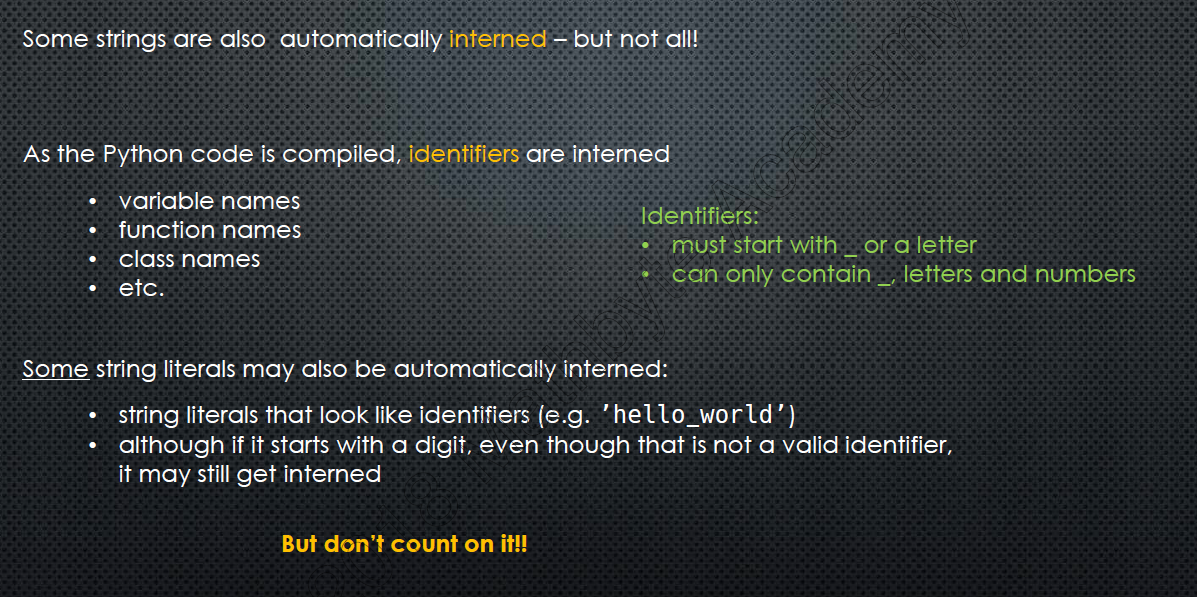

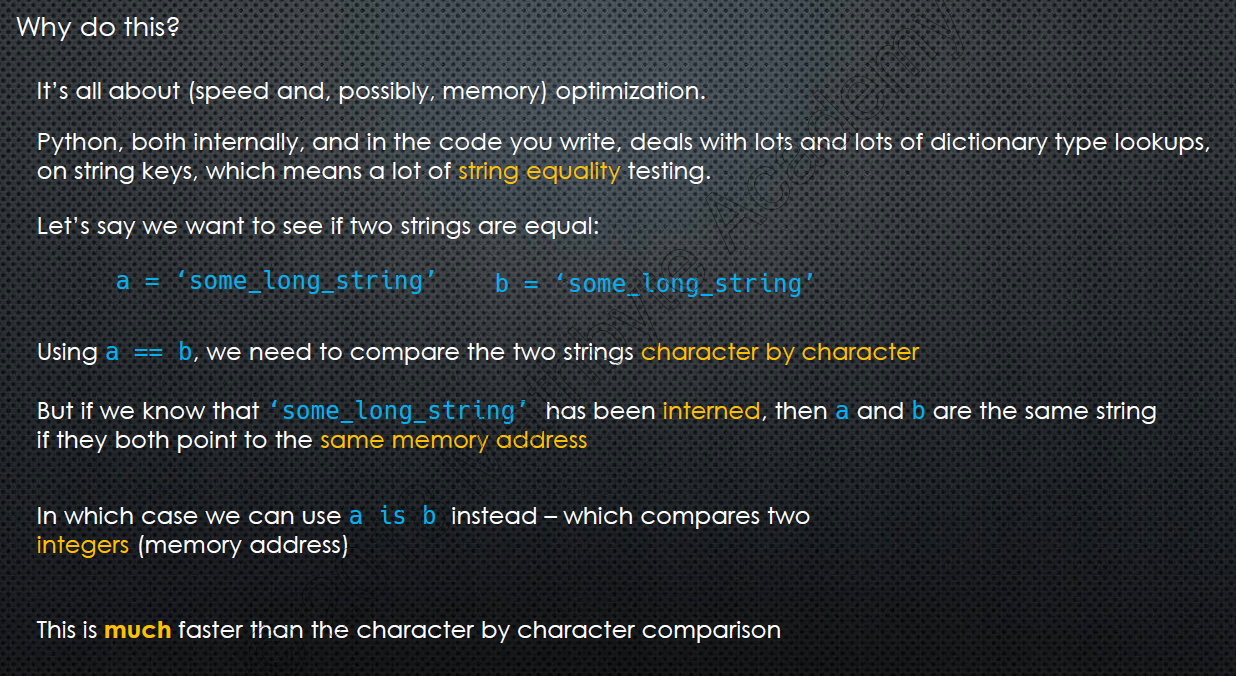

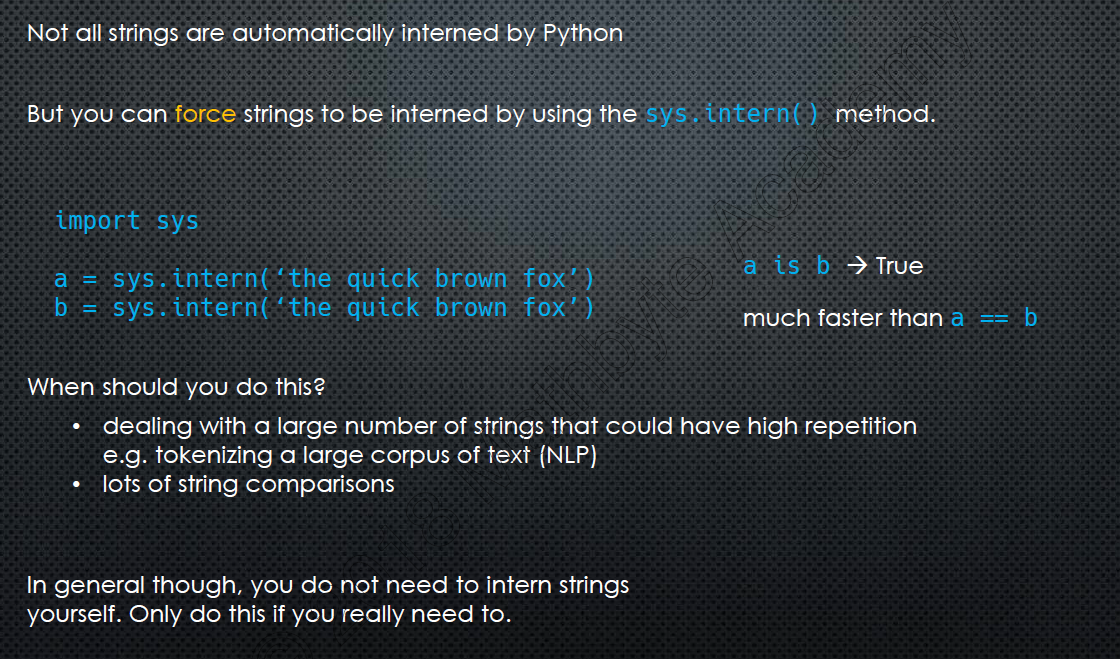

Python will automatically intern *certain* strings.

In particular all the identifiers (variable names, function names, class names, etc) are interned (singleton objects created).

Python will also intern string literals that look like identifiers.

For example:

In [1]:
a = 'hello'
b = 'hello'
print(id(a))
print(id(b))

1342722069536
1342722069536


But not the following:

In [2]:
a = 'hello, world!'
b = 'hello, world!'
print(id(a))
print(id(b))

1342722047024
1342722170928


However, because the following literals resemble identifiers, even though they are quite long, Python will still automatically intern them:

In [3]:
a = 'hello_world'
b = 'hello_world'
print(id(a))
print(id(b))

1342722047856
1342722047856


And even longer:

In [4]:
a = '_this_is_a_long_string_that_could_be_used_as_an_identifier'
b = '_this_is_a_long_string_that_could_be_used_as_an_identifier'
print(id(a))
print(id(b))

1342721886784
1342721886784


Even if the string starts with a digit:

In [5]:
a = '1_hello_world'
b = '1_hello_world'
print(id(a))
print(id(b))

1342722046256
1342722046256


That was interned (pointer is the same), but look at this one:

In [6]:
a = '1 hello world'
b = '1 hello world'
print(id(a))
print(id(b))

1342722046832
1342722172592


Interning strings (making them singleton objects) means that testing for string equality can be done faster by comparing the memory address:

In [7]:
a = 'this_is_a_long_string'
b = 'this_is_a_long_string'
print('a==b:', a == b)
print('a is b:', a is b)

a==b: True
a is b: True


#### <font color="orange">Note: Remember, using `is` ONLY works if the strings were interned!</font>

Here's where this technique fails:

In [8]:
a = 'hello world'
b = 'hello world'
print('a==b:', a==b)
print('a is b:', a is b)

a==b: True
a is b: False


You *can* force strings to be interned (but only use it if you have a valid performance optimization need):

In [9]:
import sys

In [10]:
a = sys.intern('hello world')
b = sys.intern('hello world')
c = 'hello world'
print(id(a))
print(id(b))
print(id(c))

1342722172080
1342722172080
1342722174896


Notice how `a` and `b` are pointing to the same object, but `c` is **NOT**.

So, since both `a` and `b` were interned we can use `is` to test for equality of the two strings:

In [11]:
print('a==b:', a==b)
print('a is b:', a is b)

a==b: True
a is b: True


So, does interning really make a big speed difference?

Yes, but only if you are performing a *lot* of comparisons.

Let's run some quick and dirty benchmarks:

In [12]:
def compare_using_equals(n):
    a = 'a long string that is not interned' * 200
    b = 'a long string that is not interned' * 200
    for i in range(n):
        if a == b:
            pass

In [13]:
def compare_using_interning(n):
    a = sys.intern('a long string that is not interned' * 200)
    b = sys.intern('a long string that is not interned' * 200)
    for i in range(n):
        if a is b:
            pass

In [14]:
import time

start = time.perf_counter()
compare_using_equals(10000000)
end = time.perf_counter()

print('equality: ', end-start)


equality:  2.965451618090112


In [15]:
start = time.perf_counter()
compare_using_interning(10000000)
end = time.perf_counter()

print('identity: ', end-start)

identity:  0.28690104431129626


As you can see, the performance difference, especially for long strings, and for many comparisons, can be quite radical!